In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [10]:
class Diffusor:
    """
    A class that handles an isotropic diffusion simulation
    """
    
    def __init__(self):
        """
        Constructor. (placeholder right now)
        """
        None
        
    def generate_length(self, _mu):
        """
        Generates a length as a function of the law P(x)
        = mu*exp(-mu*t). A change of variables is done to 
        allow a uniform draw to be used.
        """
        _xi = np.random.uniform(0, 1)
        _length = (-1/_mu)*np.log(1-_xi)
        
        return _length
    
    def generate_unit_vectors(self, _amount):
        """
        Simply generates a (_amount x 2) table of unit 
        vectors in random directions (uniform distribution).
        """
        _coordinates = np.empty((_amount, 2))
        
        for i in range(_amount):
            _phi = np.random.uniform(0, 2*np.pi)
            _xcoord = np.cos(_phi)
            _ycoord = np.sin(_phi)

            _coordinates[i,:] = [_xcoord, _ycoord]
            
        return _coordinates
    
    def apply_length(self, _unit_vectors, _mu):
        """
        Multiplies every line by a scaling factor 
        given at random by self.generate_length().
        """
        _vectors = np.empty(np.shape(_unit_vectors))
        
        for i in range(len(_vectors)):
            _vectors[i,:] = self.generate_length(_mu) * _unit_vectors[i,:]
            
        return _vectors
    
    def string_vectors(self, _origin, _vectors):
        """
        Adds the origin at the top of the list of vectors
        and adds the component of the first pair to the
        one after it to create a true displacement.
        """
        _origin_array = np.array(_origin)
        _vectors_plus_origin = np.vstack((_origin_array, _vectors))
        
        for i in range(len(_vectors_plus_origin)-1):
            _vectors_plus_origin[i+1,:] = _vectors_plus_origin[i,:] + _vectors_plus_origin[i+1,:]
            
        return _vectors_plus_origin
    
    def generate_walk(self, _origin, _amount, _mu):
        """
        Generates a random displacement with given
        parameters.
        """
        _walk_unit_vectors = self.generate_unit_vectors(_amount)
        _walk_vectors = self.apply_length(_walk_unit_vectors, _mu)
        _walk_path = self.string_vectors(_origin, _walk_vectors)
        
        return _walk_path
    
    def generate_coordinates(self, _origin, _amount, _mu):
        """
        Uses self.generate_walk() to create the data
        which is then split into two tables representing
        the x and y coordinates.
        """
        _coordinates = self.generate_walk(_origin, _amount, _mu)
        _xcoords = _coordinates[:,0]
        _ycoords = _coordinates[:,1]
        
        return _xcoords, _ycoords

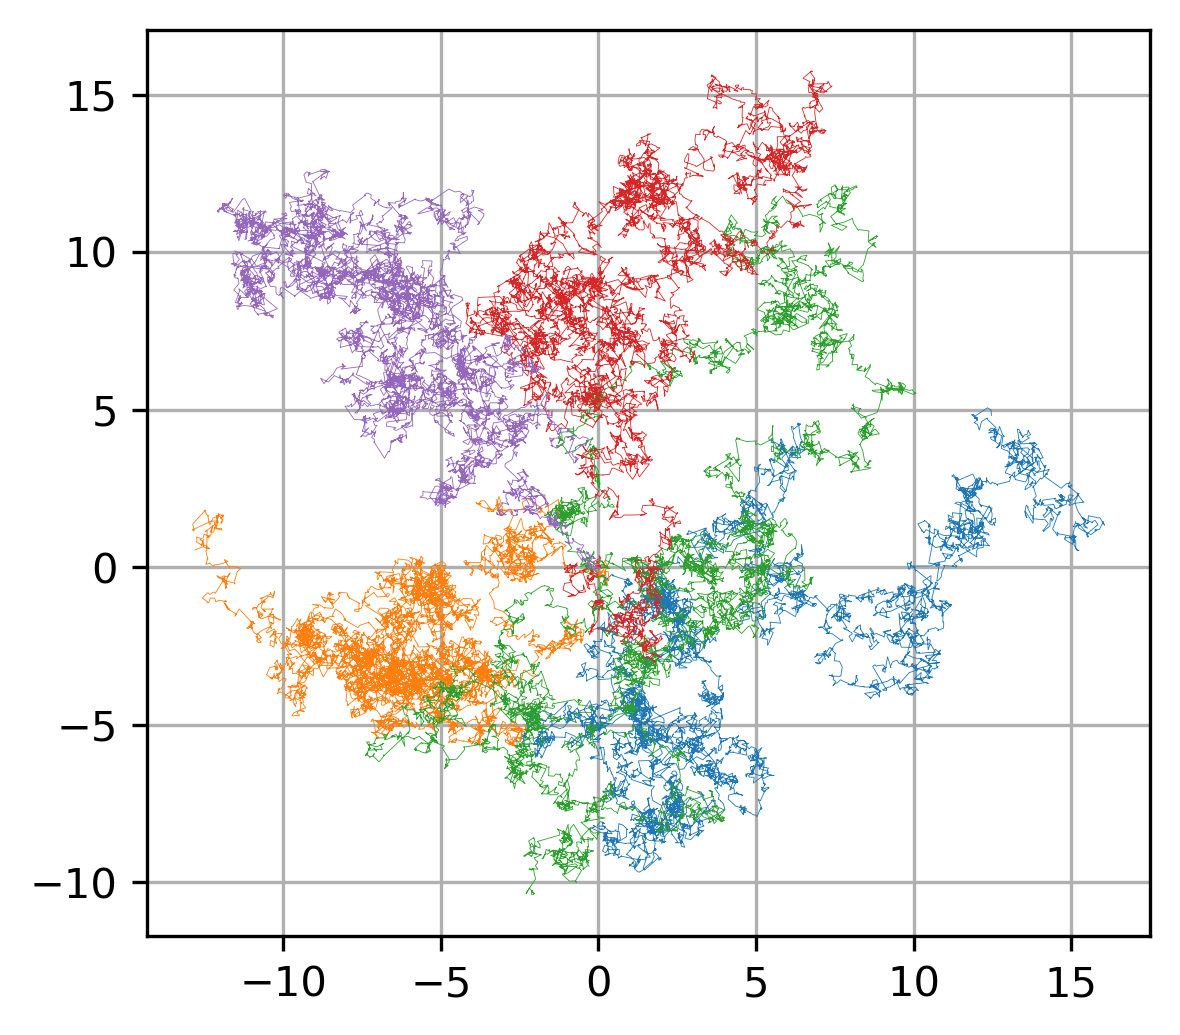

In [22]:
photons = Diffusor()

iterations = int(1e4)
mu = 10
paths = 5

# t_i = timeit.default_timer()
# data = photons.generate_walk([0,0], iterations, mu)
# t_f = timeit.default_timer() - t_i

# print(f"Temps total : {t_f}sec ||| Temps par cycle : {t_f/iterations}sec")

for i in range(paths):
    plt.plot(*photons.generate_coordinates([0,0], iterations, mu), linewidth=0.2)

plt.gca().set_aspect(1)
plt.grid()

plt.show()